1.数据集载入
iris以鸢尾花的特征作为数据来源，常用在分类操作中。该数据集由3种不同类型的鸢尾花的各50个样本数据构成。其中的一个种类与另外两个种类是线性可分离的，后两个种类是非线性可分离的。

In [84]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report


In [85]:
import pandas as pd

In [86]:
iris = load_iris()
x_train, x_test, y_train, y_test =train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
iris_data = x_train
iris_target = y_train
iris_data = np.hstack((iris_data,iris_target.reshape(-1,1)))
#iris_df = pd.DataFrame(iris_data,columns=)
iris.target_names
#array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
iris.feature_names
#['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris_df = pd.DataFrame(iris_data,columns=iris.feature_names+['species'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,4.6,3.6,1.0,0.2,0.0
1,5.7,4.4,1.5,0.4,0.0
2,6.7,3.1,4.4,1.4,1.0
3,4.8,3.4,1.6,0.2,0.0
4,4.4,3.2,1.3,0.2,0.0


c:\Users\lenovo\.conda\envs\keras\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lenovo\.conda\envs\keras\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lenovo\.conda\envs\keras\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lenovo\.conda\envs\keras\Lib\site-packages\seaborn\_oldcore.py:1119: Fut

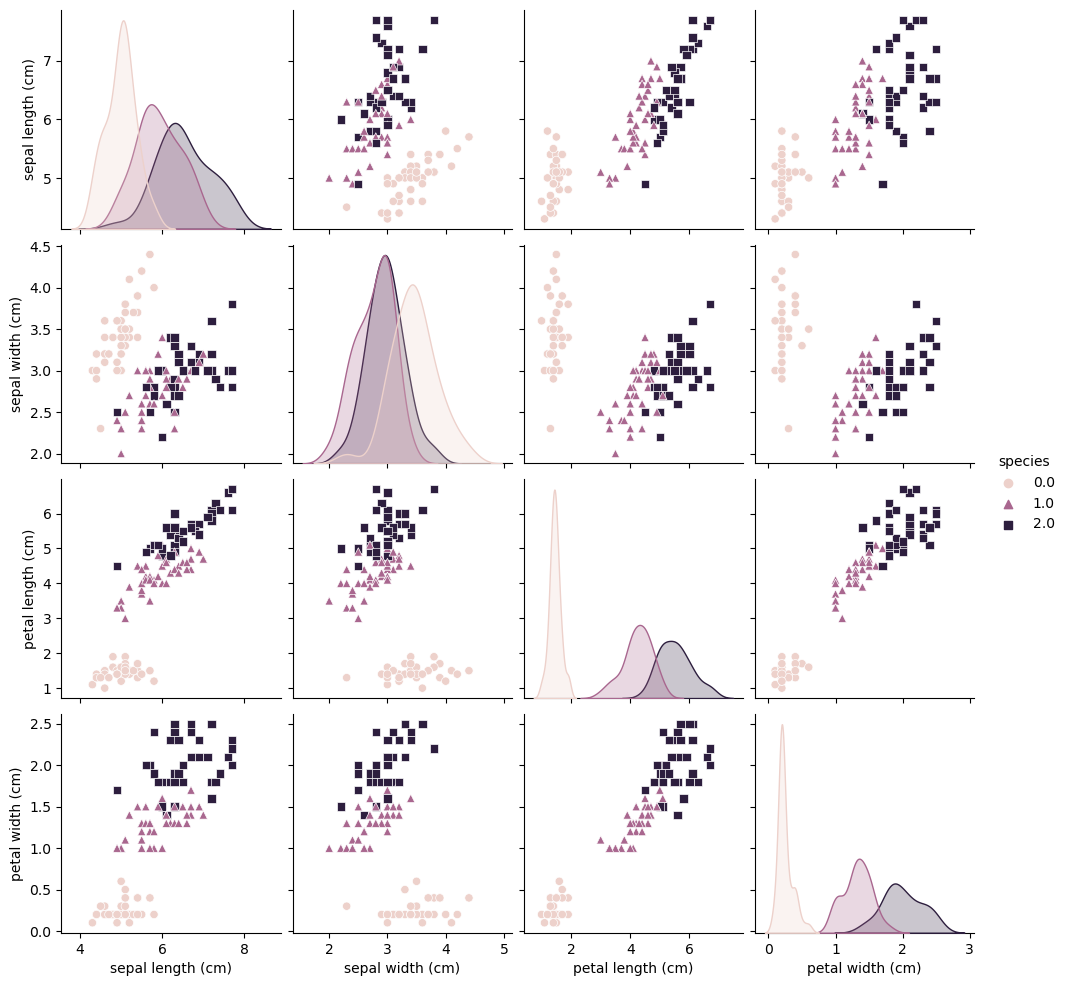

In [87]:
#Iris Setosa（山鸢尾）0、Iris Versicolour（杂色鸢尾）1，以及Iris Virginica（维吉尼亚鸢尾）2

sns.pairplot(iris_df,hue='species',markers=['o','^','s'])
plt.show()

setosa&versicolor线性可分，所以可以用线性SVM分类。

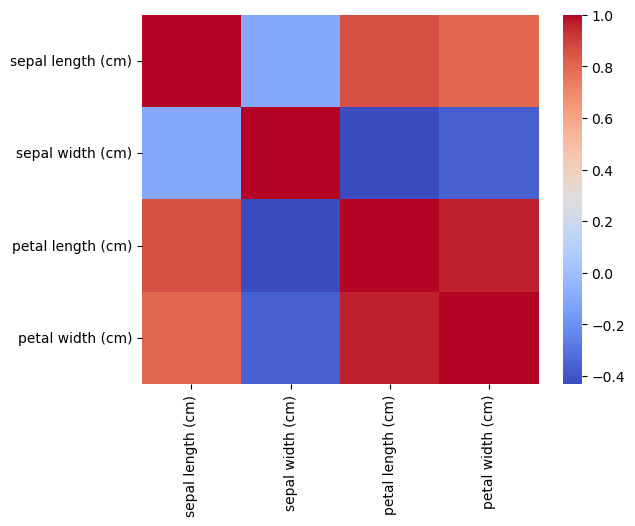

In [88]:
iris_corr = iris_df.drop('species',axis=1).corr()
sns.heatmap(iris_corr,annot=False,cmap='coolwarm')
plt.show()

线性可分例子：

In [89]:
sub_datal = iris_df[~iris_df['species'].isin(['2'])]
sub_x1 = sub_datal.drop(['species','sepal length (cm)','sepal width (cm)'], axis=1)
sub_y1 = sub_datal['species']
clf1 = svm.LinearSVC()
clf1.fit(sub_x1, sub_y1)


c:\Users\lenovo\.conda\envs\keras\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

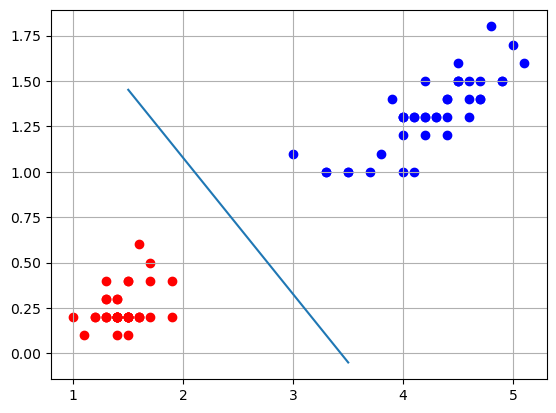

In [90]:
prediction = clf1.predict(sub_x1)
w = clf1.coef_[0]
b = clf1.intercept_[0]
x = np.linspace(1.5,3.5,100)
y = (-w[0]*x - b)/w[1]
plt.figure()
c1 = sub_y1 == 0
c2 = sub_y1 == 1
plt.scatter(sub_x1[c1].iloc[:,0],sub_x1[c1].iloc[:,1],c='r')
plt.scatter(sub_x1[c2].iloc[:,0],sub_x1[c2].iloc[:,1],c='b')

plt.plot(x,y)
plt.grid()
plt.show()



多分类问题的支持向量机

In [91]:
X1 = iris_df.drop(['species'], axis=1)
y1 = iris_df['species']
clif2 = svm.LinearSVC()
clif2.fit(X1, y1)
prediction2 = clif2.predict(X1)
X1.shape


c:\Users\lenovo\.conda\envs\keras\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\lenovo\.conda\envs\keras\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(120, 4)

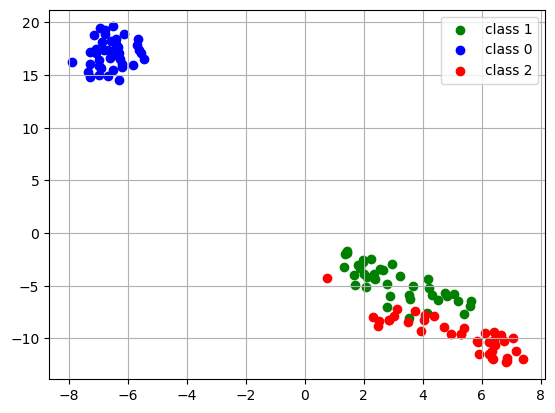

,0,1
0,-7.908671,16.201672
1,-6.501259,19.607386
2,5.044032,-5.786810
3,-6.265564,16.480213
4,-7.339118,15.324235
...,...,...
115,3.226291,-4.100227
116,0.753103,-4.294798
117,-6.949405,19.459089
118,2.541392,-3.410226


In [92]:
x1_tSNE = pd.DataFrame(TSNE(n_components=2).fit_transform(X1))

c1 = y1 == 0
c2 = y1 == 1
c3 = y1 == 2
colors = ['b', 'g', 'r']

plt.scatter(x1_tSNE[c2].iloc[:,0], x1_tSNE[c2].iloc[:,1], c='g', label='class 1')
plt.scatter(x1_tSNE[c1].iloc[:,0],  x1_tSNE[c1].iloc[:,1], c='b', label='class 0')
plt.scatter(x1_tSNE[c3].iloc[:,0], x1_tSNE[c3].iloc[:,1], c='r', label='class 2')
plt.legend()
plt.grid()
plt.show()

x1_tSNE


In [95]:
confidence = clif2.decision_function(X1[:5])
print(confidence)

[[ 1.68339356 -1.03803224 -7.36170667]
 [ 1.75292269 -1.61944507 -8.15387571]
 [-1.44319021 -0.21014276 -1.7463422 ]
 [ 1.14522913 -0.64408934 -6.4469467 ]
 [ 1.22367138 -0.61022174 -6.31479529]]
